# Data Science Academy

## Análise de Dados com Linguagem Python

### Projeto 9

### Pré - Processamento de Dados de Texto Extraídos de Data Lake

In [11]:
# Imports
import json
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Conectando no Data Lake

In [12]:
# Abra a conexão
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [13]:
# Visualiza a conexão
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [14]:
# Cria um repositório chamado datalake
datalake = client["datalake"]

In [15]:
datalake

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datalake')

In [16]:
# Se existir, deleta a coleção chamada posts
datalake.posts.drop()

In [17]:
# Cria a coleção chamada posts
posts = datalake["posts"] 

### Carregando Dados no Data Lake

In [18]:
# Carrega o arquivo json em uma variavel Python
with open ('dataset.json') as file:
    file_data = json.load(file)

In [19]:
file_data

[{'status': 'public',
  'creationDate': '2017-07-17T20:05:49Z',
  'allowComments': True,
  'title': 'ligula nec sem duis aliquam',
  'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
  'tags': 1,
  'Category': 'lifestyle',
  'filteredPicture': False},
 {'status': 'private',
  'creationDate': '2019-01-19T15:45:57Z',
  'allowComments': False,
  'title': 'mus vivamus vestibulum sagittis sapien cum',
  'description': 'nec nisi volutpat eleifend donec ut dolor morbi vel le

In [20]:
# Insere o conteúdo do arquivo json na coleção chamada posts. Cada item do arquivo será um documento.
posts.insert_many(file_data, ordered = False, bypass_document_validation = True)

InsertManyResult([ObjectId('6664c92a849f9d0964714fce'), ObjectId('6664c92a849f9d0964714fcf'), ObjectId('6664c92a849f9d0964714fd0'), ObjectId('6664c92a849f9d0964714fd1'), ObjectId('6664c92a849f9d0964714fd2'), ObjectId('6664c92a849f9d0964714fd3'), ObjectId('6664c92a849f9d0964714fd4'), ObjectId('6664c92a849f9d0964714fd5'), ObjectId('6664c92a849f9d0964714fd6'), ObjectId('6664c92a849f9d0964714fd7'), ObjectId('6664c92a849f9d0964714fd8'), ObjectId('6664c92a849f9d0964714fd9'), ObjectId('6664c92a849f9d0964714fda'), ObjectId('6664c92a849f9d0964714fdb'), ObjectId('6664c92a849f9d0964714fdc'), ObjectId('6664c92a849f9d0964714fdd'), ObjectId('6664c92a849f9d0964714fde'), ObjectId('6664c92a849f9d0964714fdf'), ObjectId('6664c92a849f9d0964714fe0'), ObjectId('6664c92a849f9d0964714fe1'), ObjectId('6664c92a849f9d0964714fe2'), ObjectId('6664c92a849f9d0964714fe3'), ObjectId('6664c92a849f9d0964714fe4'), ObjectId('6664c92a849f9d0964714fe5'), ObjectId('6664c92a849f9d0964714fe6'), ObjectId('6664c92a849f9d0964714f

In [21]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664c92a849f9d0964714fce'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [22]:
# Extrai o número de documentos (posts)
n = posts.estimated_document_count()

In [23]:
n

2000

### Pré - Processamento e Análise 

Agregação para calcular o número de posts em cada categoria

In [24]:
# Agregação para calcular o número de posts em cada categoria
posts_cat = posts.aggregate([{"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                             {"$sort": {"_id.Category": 1, "count": -1}}])

In [25]:
print(posts_cat)

In [26]:
# Converte o resultado da agregação em um dataframe
pc_df = pd.DataFrame(list(posts_cat))

In [27]:
pc_df.head()

,_id,count
0,arts,311
1,fashion,300
2,lifestyle,294
3,movies,289
4,educational,274


In [28]:
# Listas os ids (Categorias)
list(pc_df["_id"])

['arts', 'fashion', 'lifestyle', 'movies', 'educational', 'politics', 'sports']

<AxesSubplot:ylabel='count'>

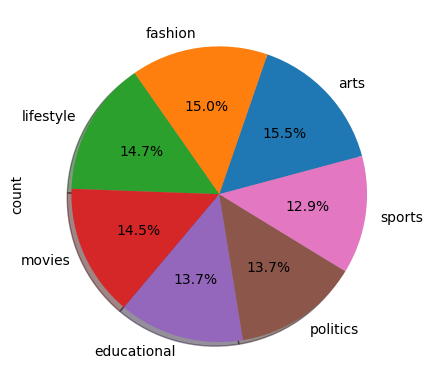

In [32]:
# Plot
pc_df.plot.pie(y = 'count',
               labels = pc_df['_id'],
               autopct = '%1.1f%%',
               startangle = 15,
               shadow = True,
               legend = False)

Número de posts publicos e privados da categoria polítics

In [33]:
# Número de posts públicos e privados da categoria política
pol_sta = posts.aggregate([{"$match": {"Category": "politics"}},
                           {"$group": {"_id": "$status", "count": {"$sum": 1}}}])

In [34]:
ps_df = pd.DataFrame(list(pol_sta))

In [35]:
ps_df

,_id,count
0,private,148
1,public,126


<AxesSubplot:title={'center':'Número de Posts Públicos e Privados'}, xlabel='_id'>

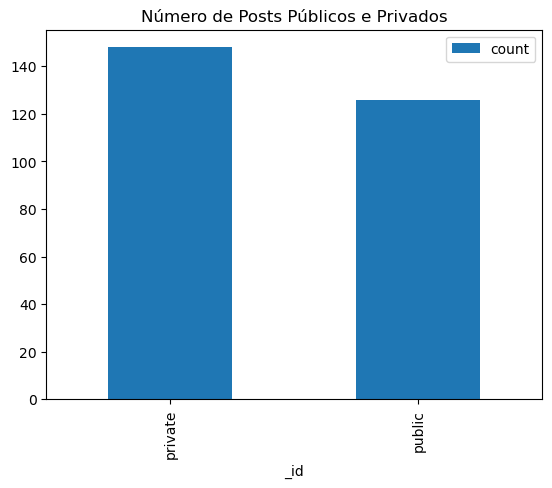

In [36]:
# Plot
ps_df.plot.bar(x = '_id',
               y = 'count',
               title = "Número de Posts Públicos e Privados")


Qual ano teve o maior número de posts?

In [37]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664c92a849f9d0964714fce'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [38]:
# Update many (cria duas novas variáveis para cada documento)
datalake.posts.update_many({}, {'$set': {"hour": 0}});
datalake.posts.update_many({}, {'$set': {"year": 0}});

In [39]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664c92a849f9d0964714fce'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': 0,
 'year': 0}

In [40]:
# Update one (atualiza as duas variáveis com os valores correspondetes extraídos da coluna de data)
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {'$set': {'hour': data['creationDate'].split('T')[1].split(':')[0],
                               'year': data['creationDate'].split('T')[0].split('-')[0]}})

In [41]:
# Retorna 1 item
posts.find_one()

{'_id': ObjectId('6664c92a849f9d0964714fce'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [42]:
# Agregação 
posts_yr = posts.aggregate([{"$group": {"_id": "$year", "count": {"$sum": 1}}},
                            {"$sort": {"_id.year": 1, "count": 1}}])

In [43]:
py_df = pd.DataFrame(list(posts_yr))
py_df

,_id,count
0,2015,76
1,2016,299
2,2019,303
3,2017,309
4,2021,330
5,2020,334
6,2018,349


<AxesSubplot:title={'center':'Número de Posts Por Ano'}, xlabel='_id'>

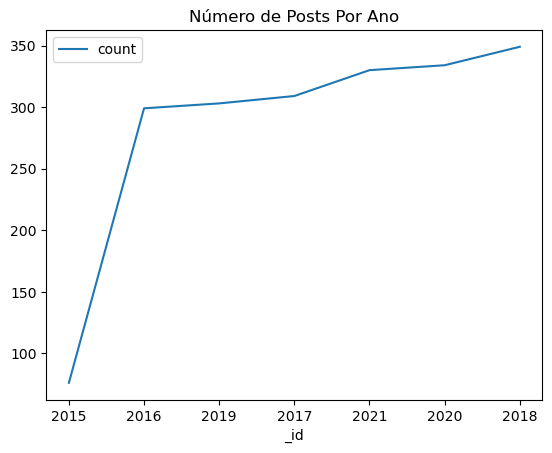

In [44]:
# Plot 
py_df.plot.line(x = '_id',
                y = 'count',
                title = "Número de Posts Por Ano")

Qual o horário com maior número de posts?

In [45]:
# Agregação e ordenação
posts_hr = posts.aggregate([{"$group": {"_id": "$hour", "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [46]:
for i in range(3):
    print(posts_hr.next())

{'_id': '00', 'count': 103}
{'_id': '08', 'count': 101}
{'_id': '02', 'count': 99}
